In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import math

a = 1000.05624604543e-3
b = 10.6068254211646e-3

f1 = 0.0e-3
f2 = f1 + 2.0 * math.sqrt(a * a + b * b)

# parabola part
p = 0.0562460454334836e-3

# whole mirror
WD = 1902.50110774383e-3
ML = 200.0e-3

param1 = 1.0 / (a * a)
param2 = -(f1 + f2) / (a * a) + 4.0 * p / (b * b)
param3 = math.pow(f1 + f2, 2) / (4.0 * a * a) - 4.0 * p * (p + f2) / (b * b) - 1.0
seam = (-param2 - math.sqrt(param2**2 - 4.0 * param1 * param3)) / (2.0 * param1)

def parabola(z):
    return math.sqrt(-4.0 * p * (z - p - f2))
def hyperbola(z):
    return b * math.sqrt((z - (f1 + f2) / 2)**2 / a**2 - 1.0)

entrance_radius = parabola(f1 - WD - ML)
seam_radius = parabola(seam)
exit_radius = hyperbola(f1 - WD)
ring_radius = seam_radius * WD / (f1 - seam)

<ipython-input-26-247b739dd857>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
<ipython-input-26-247b739dd857>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xticklabels)


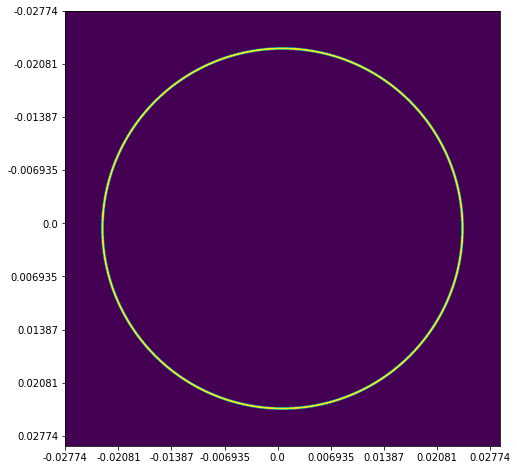

In [26]:
N = 2048
exit_length = 1.2 * 2.0 * exit_radius
x = np.linspace(-0.5 * exit_length, 0.5 * exit_length, N)
y = x.copy()
x, y = np.meshgrid(x, y)
r = np.hypot(x, y)

ring = np.zeros((N, N), dtype=np.complex)
ring[(ring_radius<=r) & (r<=exit_radius)] = 1.0

xtick = np.linspace(0.0, 1.0, 10)
xticklabels = np.linspace(-0.5 * exit_length, 0.5 * exit_length, 11, dtype=np.float16)
#xticklabels = np.concatenate(
#    [np.linspace(-0.5 * exit_length, 0, 6, dtype=np.float16),
#    np.linspace(0, 0.5 * exit_length, 10, dtype=np.float16)])
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(xticklabels)
ax.imshow(np.abs(ring))
fig.savefig('../../thesis/chap1/figure/wolter_thinring.png')

In [25]:
print('ring_thickness:', 1.0e+6 * (exit_radius - ring_radius), 'um')

ring_thickness: 363.3442816094734 um
